in questo esercizio non quadrano tantissimo gli LCL (non sembra essere un IDC pienamente simmetrico il loro mentre il mio sì!) perciò i beta poi sono leggermente diversi

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import qda
import myfunc as mf

# Import the dataset

data_dictionary = {'sample':[1,2,3,4,5],
        'Diameter1_1': [20.78,20.49,20.59,20.43,20.3],
        'Diameter1_2': [19.89, 20.63, 20.44, 20.46,20.58],
        'Diameter1_3': [20.22,20.35,20.73,20.62,20.24],
        'Diameter2_1': [24.88,25.34,25.56,25.76,25.53],
        'Diameter2_2':[25.19,25.59,25.17,25.23,25.32],
        'Diameter2_3':[25.16,25.42,25.25,25.42,25.37]}
 
data = pd.DataFrame(data_dictionary)
#data = pd.read_csv('July-2.csv')

# Inspect the dataset
print(data.head())
print(data.info())

   sample  Diameter1_1  Diameter1_2  Diameter1_3  Diameter2_1  Diameter2_2  \
0       1        20.78        19.89        20.22        24.88        25.19   
1       2        20.49        20.63        20.35        25.34        25.59   
2       3        20.59        20.44        20.73        25.56        25.17   
3       4        20.43        20.46        20.62        25.76        25.23   
4       5        20.30        20.58        20.24        25.53        25.32   

   Diameter2_3  
0        25.16  
1        25.42  
2        25.25  
3        25.42  
4        25.37  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sample       5 non-null      int64  
 1   Diameter1_1  5 non-null      float64
 2   Diameter1_2  5 non-null      float64
 3   Diameter1_3  5 non-null      float64
 4   Diameter2_1  5 non-null      float64
 5   Diameter2_2  5 non-null      f

In [2]:
mu1=20.5
mu2=25.5
sigma1=0.2
sigma2=0.28
p=2
n=3
m=5
alfa_overall=0.01
alfa_single=1-(1-alfa_overall)**(1/p)
ARL_single=1/alfa_single
k_alfa_s=stats.norm.ppf(1-alfa_single/2)

In [3]:
diameter1_mean=data.iloc[:,1:4].mean(axis=1)
diameter2_mean=data.iloc[:,4:].mean(axis=1)
data_mean = pd.DataFrame({'sample_mean1': diameter1_mean})
data_mean['sample_mean2']=diameter2_mean

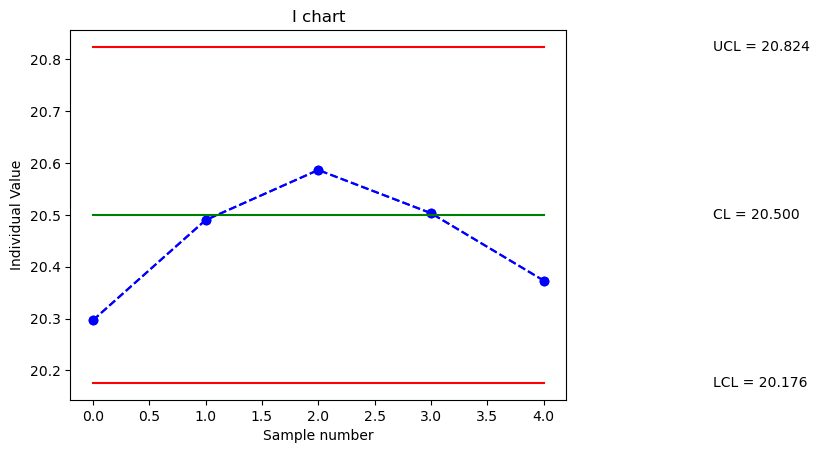

In [4]:
df_CC1=mf.IMR_my(data_mean['sample_mean1'],n,k_alfa_s,mu1,sigma1/np.sqrt(n),'no','no',use_means_as_I='no')

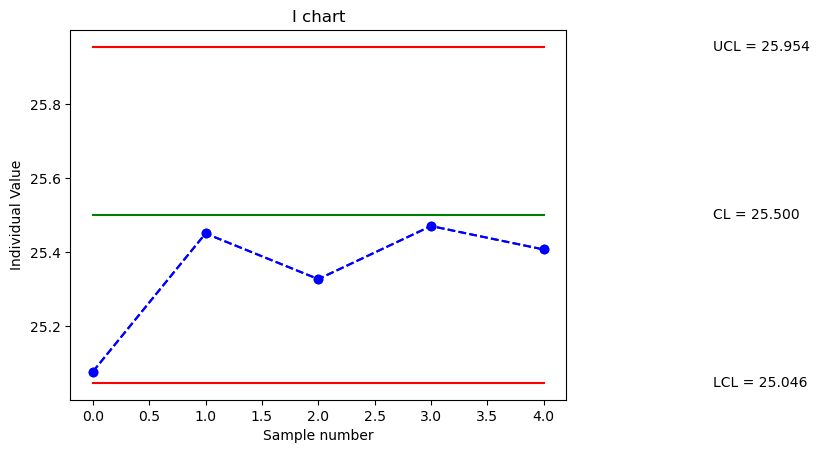

In [5]:
df_CC2=mf.IMR_my(data_mean['sample_mean2'],n,k_alfa_s,mu2,sigma2/np.sqrt(n),'no','no',use_means_as_I='no')

Determine the 𝐴𝑅𝐿0 value if no familywise correction on the Type I error is applied and compare it 
with the 𝐴𝑅𝐿0 of the chart designed at point a). Discuss the result. 

In [6]:
alfa=0.01
k_alfa=stats.norm.ppf(1-alfa/2)
alfa_family=1-(1-alfa)**(p)
ARL_family=1/alfa_family
k_alfa_family=stats.norm.ppf(1-alfa_family/2)
print(ARL_family)

50.25125628140696


in case both the diameters exhibit a shift of the mean ∆𝜇1 = ∆𝜇2 = 0.3 𝑚𝑚, determine the 
probability of detecting it at the first sample after the shift using the control chart designed at point 
a). 

In [7]:
shift=0.3
delta1=shift/sigma1
delta2=shift/sigma2

In [11]:
beta1=stats.norm.cdf(k_alfa_s-delta1*np.sqrt(n))-stats.norm.cdf(-k_alfa_s-delta1*np.sqrt(n))
print(beta1)
beta2=stats.norm.cdf(k_alfa_s-delta2*np.sqrt(n))-stats.norm.cdf(-k_alfa_s-delta2*np.sqrt(n))
print(beta2)
beta_tot=beta1*beta2
print(beta_tot)
print('la proba che mi interessa è %.3f' %(1-beta_tot))

0.5824436935819354
0.8290582841383443
0.4828797692082389
la proba che mi interessa è 0.517


What is the minimum sample size to be used to detect a simultaneous shift of the means ∆𝜇1 =
 ∆𝜇2 = 0.3 𝑚𝑚 with a probability 𝑃 > 90%? 

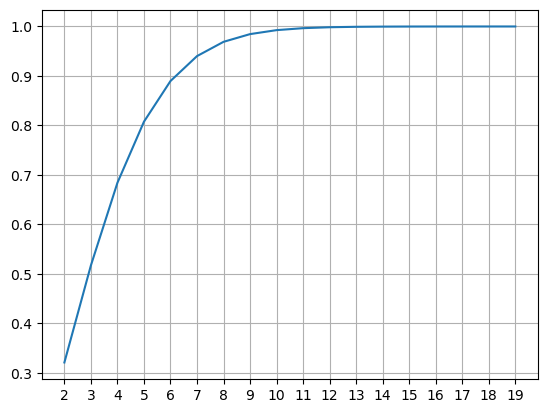

In [12]:
n=np.arange(2,20,1)
beta1=stats.norm.cdf(k_alfa_s-delta1*np.sqrt(n))-stats.norm.cdf(-k_alfa_s-delta1*np.sqrt(n))
beta2=stats.norm.cdf(k_alfa_s-delta2*np.sqrt(n))-stats.norm.cdf(-k_alfa_s-delta2*np.sqrt(n))
beta_tot=beta1*beta2
power=1-beta_tot
plt.plot(n,power)
plt.grid()
plt.plot()
plt.xticks(range(2, 20))
plt.show()

#la risposta è n=7 perchè n=6 non arriva a 90%